# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('chained_assignment', None)

In [2]:
#df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df = pd.read_csv('C:\\Users\\admin\\Desktop\\DS_yandex\\02_Исследование объявлений о продаже квартир\\real_estate_data.csv')
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

display(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
print(' Пропусков в столбце "floors_total" -', df['floors_total'].isnull().sum(), '\n', 
      'Пропусков в столбце "ceiling_height" -', df['ceiling_height'].isnull().sum(), '\n',
     'Пропусков в столбце "living_area" -', df['living_area'].isnull().sum(), '\n',
     'Пропусков в столбце "kitchen_area" -', df['kitchen_area'].isnull().sum(), '\n',
     'Пропусков в столбце "locality_name" -', df['locality_name'].isnull().sum(), '\n',
     'Пропусков в столбце "days_exposition" -', df['days_exposition'].isnull().sum())

 Пропусков в столбце "floors_total" - 86 
 Пропусков в столбце "ceiling_height" - 9195 
 Пропусков в столбце "living_area" - 1903 
 Пропусков в столбце "kitchen_area" - 2278 
 Пропусков в столбце "locality_name" - 49 
 Пропусков в столбце "days_exposition" - 3181


#### Вывод

Информация о таблице показывает, что есть пропущенные значения в столбцах 'floors_total', 'ceiling_height', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'. Строки с пропущенными значениями в столбцах 'floors_total' и 'locality_name' удалим, так как этих строк мало и нет возможности их заполнить. Пропуски в 'ceiling_height'  можно заполнить медианными значениями взятыми по группировке квартир по площади и количеству комнат, а пропуски в 'living_area' и 'kitchen_area' заполнить с помощью коэффициента отношения жилой площидт к общей и площади кухни к общей соответственно. Пропуски в остальных столбцах заполнять не будем, так как данные в них либо не нужны при решении поставленных задач, либо нет возможности их заполнить(касается пропусков в расстоянии от аэропорта, центра города, парков и водоемов).
Так же бросается в глаза типы данных в некоторых столбцах, где-то точность float64 не требуется и можно заменить на int64, а где-то он и вовсе неверно указан (в 'is_apartment').

### Шаг 2. Предобработка данных

In [5]:
# Функция для заполнения пропусков в жилой площади и площади кухни
def lk_area(): 
    new_df = df.query('living_area != "Nan"')
    dl = {}
    for i in list(new_df['rooms'].sort_values(ascending=True).unique()):
        dd = new_df.query('rooms == @i')
        dd['lt'] = dd['living_area']/dd['total_area']
        dl[i] = dd['lt'].median()
    ind = df.query('living_area == "Nan"').index.to_list()
    for j in ind:
        df['living_area'][j] = round(df['total_area'][j] * dl[df['rooms'][j]], 1)
    new_df = df.query('kitchen_area != "Nan"')
    dl = 0
    for i in range(new_df.shape[0]):
        new_df['kt'] = new_df['kitchen_area']/new_df['total_area']
        dl = new_df['kt'].median()
    ind = df.query('kitchen_area == "Nan"').index.to_list()
    for j in ind:
        df['kitchen_area'][j] = round(df['total_area'][j] * dl, 1)
    return df

In [6]:
# функция для создания словаря населенных пунктов
def loc_dic(): 
    dict_loc = df['locality_name'].drop_duplicates().to_list()
    d = {}
    for l in dict_loc:
        t,k,v = 0,[],[]
        for i in l.split():
            if i[0].isupper() or t == 1:
                k.append(i)
                t = 1
            else:
                if i == 'посёлок':
                    i = 'поселок'
                v.append(i)
        k,v = ' '.join(k), ' '.join(v)
        if (k not in d) or (len(v)) > (len(d[k])):
            d[k] = v
    return d

In [7]:
# функция для приведения населенных пунктов к единому виду
def new_loc(row): 
    d = loc_dic()
    t,k = 0,[]
    for i in row['locality_name'].split():
        if i[0].isupper() or t == 1:
            k.append(i)
            t = 1
    k = ' '.join(k)
    if d[k] != '':
        return d[k] + ' ' + k
    else:
        return k

In [8]:
df = lk_area()

# Избавимся от слишком больших значений высоты потолков
df = df.query('ceiling_height <= 4 or ceiling_height == "NaN"') 

# замена пропущенных значений высоты потолков медианами по общей площади
df['ceiling_height'] = round(df.groupby('total_area')['ceiling_height'].apply(lambda x: x.fillna(x.median())), 2)

# замена пропусков на False, изменение типа данных на bool
df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool') 

# перевод даты в формат даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S') 

# удаление строк с пропущенными значениями
df.dropna(subset = ['locality_name', 'floors_total'], inplace = True) 

# замена типа данных на Int64
df[['last_price', 'floors_total']]=df[['last_price', 'floors_total']].astype('int')

In [9]:
df['locality_name'] = df.apply(new_loc, axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14406 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14406 non-null  int64         
 1   last_price            14406 non-null  int32         
 2   total_area            14406 non-null  float64       
 3   first_day_exposition  14406 non-null  datetime64[ns]
 4   rooms                 14406 non-null  int64         
 5   ceiling_height        14406 non-null  float64       
 6   floors_total          14406 non-null  int32         
 7   living_area           13618 non-null  float64       
 8   floor                 14406 non-null  int64         
 9   is_apartment          14406 non-null  bool          
 10  studio                14406 non-null  bool          
 11  open_plan             14406 non-null  bool          
 12  kitchen_area          13484 non-null  float64       
 13  balcony         

#### Вывод

В данном шаге были обработаны пропуски и изменены типы данных.
Удалены строки с пропусками в столбцах 'locality_name', 'floors_total'. Пропуски в 'is_apartment' заменены на значение 'False' и изменен тип данных на bool. В 'ceiling_height' пропуски заменены на медианные значения высоты потолков по количеству комнат в квартире. 
Дата публикации переведена из формата object в формат даты, а у значений столбцов 'last_price', 'floors_total' изменен тип данных на Integer.
Наименования населенных пунктов в столбце 'locality_name' приведены к единому виду. Например, вместо значений "Мурино", "поселок Мурино" и "посёлок Мурино" теперь стоит "поселок Мурино".

### Шаг 3. Посчитаем и добавим в таблицу новые признаки

In [11]:
# добавление в датафрейм столбца с ценой кв.метра
df['square_meter_price'] = (df['last_price']/df['total_area']).astype('int') 

# добавление в датафрейм столбца с номером дня недели из даты публикации
df['day_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).day

# добавление в датафрейм столбца с номером месяца из даты публикации
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month 

# добавление в датафрейм столбца с годом из даты публикации
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [12]:
#функция для категоризации этажа квартиры
def flo_cat(row): 
    fc = row['floors_total'] - row['floor']
    if row['floor'] == 1:
        return 'первый'
    elif fc == 0:
        return 'последний'
    else:
        return 'другой'

In [13]:
# добавление в датафрейм столбца с категорией этажа
df['floor_category'] = df.apply(flo_cat, axis = 1) 

In [14]:
# добавление в датафрейм столбца с соотношением жилой и общей площади
df['total/living'] = df['living_area']/df['total_area']

# добавление в датафрейм столбца с с соотношением площади кухни и общей площади
df['total/kitchen'] = df['kitchen_area']/df['total_area'] 

In [15]:
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,floor_category,total/living,total/kitchen
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,7,3,2019,другой,0.472222,0.231481
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,19,6,2018,другой,0.320000,0.410000
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524,26,2,2017,другой,0.714754,0.106557
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525,16,11,2017,другой,0.512626,0.214646
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,False,False,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943,1,7,2017,последний,0.630841,0.121495


#### Вывод

В датафрейм добавлены столбцы с ценой квадратного метра, номером дня, месяца и года публикации объявления, категорией этажа, и с соотношением площадей жилая-общая и кухня-общая.

### Шаг 4. Проведем исследовательский анализ данных и выполним инструкции:

#### Изучение и обработка значений столбца 'total_area'

In [16]:
# Функция для автоматического построения гистограмм по значениям нужных столбцов
def analysis(c, b1, b2): 
    n = df[c].describe()
    minq = n['25%'] - ((n['75%'] - n['25%'])*1.5)
    if minq < 0:
        minq = 0
    maxq = n['75%'] + ((n['75%'] - n['25%'])*1.5)
    print (df.plot(bins = b1, kind = 'hist', grid = True, title = ('График всех значений столбца "' + c + '"'), y = c, label = ('Значения столбца\n"' + c + '"')), 
           df.plot(bins = b2, kind = 'hist', grid = True, title = ('График значений столбца "' + c + '"\n с отсечением слишком малых и слишком больших значений'), y = c, label = ('Значения столбца\n"' + c + '"'), xlim = (minq, maxq)),
          '\n\nПримерное минимальное значение столбца', c, ', на которое\nмы будем опираться при отсеивании слишком малых значений:', minq, '\n\n'
           'Примерное максимальное значение столбца', c, ', на которое\nмы будем опираться при отсеивании слишком больших значений:',maxq, '\n\n',
          n)

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755) 

Примерное минимальное значение столбца total_area , на которое
мы будем опираться при отсеивании слишком малых значений: 0 

Примерное максимальное значение столбца total_area , на которое
мы будем опираться при отсеивании слишком больших значений: 116.0 

 count    14406.000000
mean        61.607943
std         36.043630
min         12.000000
25%         41.000000
50%         53.200000
75%         71.000000
max        900.000000
Name: total_area, dtype: float64


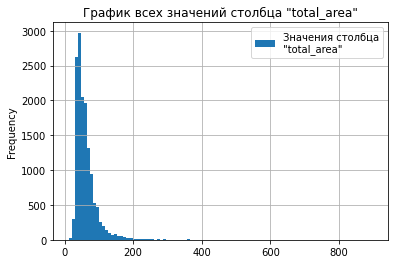

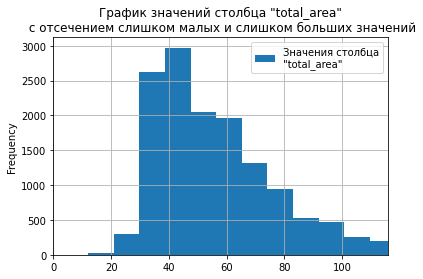

In [17]:
analysis('total_area', 100, 100)

Среди значений общей площади видим как слишком малые, так и чрезмерно большие. Избавимся от них.
Оставляем в датасете только строки, удовлетворяющие одно из условий:

 - площадь не менее 24 кв.м для студий, либо квартир с открытой планировкой;
 - площадь не менее 28 кв.м для однокомнатных квартир;
 - площадь не менее 44 кв.м для двухкомнатных квартир;
 - площадь не менее 56 кв.м для трехкомнатных квартир;
 - площадь не менее 70 кв.м для четырехкомнатных квартир;
 - площадь не менее 84 кв.м для пятикомнатных квартир;
 - площадь не менее 103 кв.м для квартир с шестью и более комнатами;
 - площадь не более 120 кв.м.
 
 
Минимальный метраж для квартир взят из СП 54.13330.2016

In [18]:
# Создаем новый датафрейм по условиям, которые описаны выше
df = df.query('((total_area > 24 and total_area < 120) and (studio == True or open_plan == True)) or \
((total_area > 28 and total_area < 120) and rooms == 1 and studio == False) or \
((total_area > 44 and total_area < 120) and rooms == 2 and studio == False) or \
((total_area > 56 and total_area < 120) and rooms == 3 and studio == False) or \
((total_area > 70 and total_area < 120) and rooms == 4 and studio == False) or \
((total_area > 84 and total_area < 120) and rooms == 5 and studio == False) or \
((total_area > 103 and total_area < 120) and rooms >= 6 and studio == False)'
             )

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

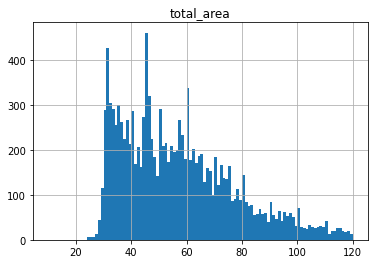

In [19]:
df.hist(bins = 110, column = 'total_area', range = (10, 120))

#### Изучение и обработка значений столбца 'last_price'

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755) 

Примерное минимальное значение столбца last_price , на которое
мы будем опираться при отсеивании слишком малых значений: 0 

Примерное максимальное значение столбца last_price , на которое
мы будем опираться при отсеивании слишком больших значений: 11600000.0 

 count    1.250500e+04
mean     5.743460e+06
std      3.591197e+06
min      1.219000e+04
25%      3.600000e+06
50%      4.890000e+06
75%      6.800000e+06
max      5.300000e+07
Name: last_price, dtype: float64


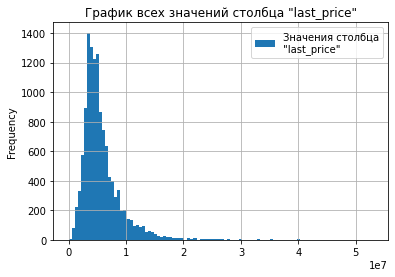

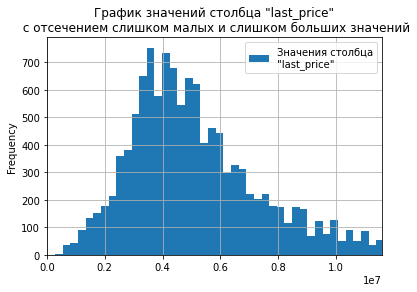

In [20]:
analysis('last_price', 100, 200)

По описанию данных столбца 'last_price' видно, что минимум и максимум разнятся относительно медианы на два порядка. Необходимо удалить слишком малые и слишком большие значения. Корректнее всего это сделать сравнение цен за кв.м в разрезе количества комнат в квартире и убрать выбивающиеся значения.

count     11942.000000
mean      95997.910903
std       27354.970797
min       20338.000000
25%       78907.250000
50%       96153.000000
75%      113472.250000
max      191358.000000
Name: square_meter_price, dtype: float64

count    1.194200e+04
mean     5.400398e+06
std      2.626459e+06
min      1.050000e+06
25%      3.600000e+06
50%      4.800000e+06
75%      6.500000e+06
max      1.850000e+07
Name: last_price, dtype: float64

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

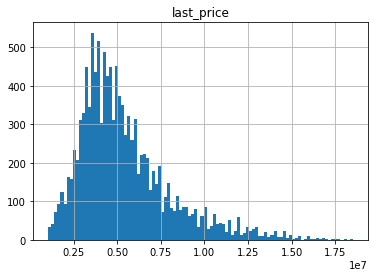

In [21]:
for i in range(len(df['rooms'].unique())):
    n = df.query('rooms == @i')['square_meter_price'].describe()
    minq = n['25%'] - ((n['75%'] - n['25%'])*1.5)
    maxq = n['75%'] + ((n['75%'] - n['25%'])*1.5)
    df = df.query('(rooms == @i and (square_meter_price >= @minq and square_meter_price <= @maxq)) or rooms != @i')
display(df['square_meter_price'].describe())
display(df['last_price'].describe())
df.hist(bins = 100, column = 'last_price')

#### Изучение и обработка значений столбца 'rooms'

count    11942.000000
mean         1.981075
std          0.912269
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

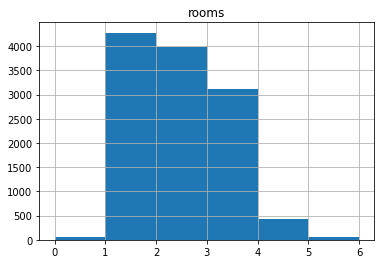

In [22]:
df.hist(bins = 6, column = 'rooms')
display(df['rooms'].describe())

#### Изучение и обработка значений столбца 'ceiling_height'

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755) 

Примерное минимальное значение столбца ceiling_height , на которое
мы будем опираться при отсеивании слишком малых значений: 2.1699999999999995 

Примерное максимальное значение столбца ceiling_height , на которое
мы будем опираться при отсеивании слишком больших значений: 3.1300000000000003 

 count    11942.000000
mean         2.698492
std          0.227054
min          1.000000
25%          2.530000
50%          2.650000
75%          2.770000
max          4.000000
Name: ceiling_height, dtype: float64


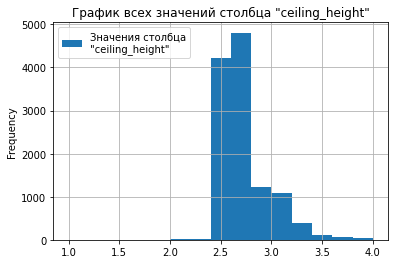

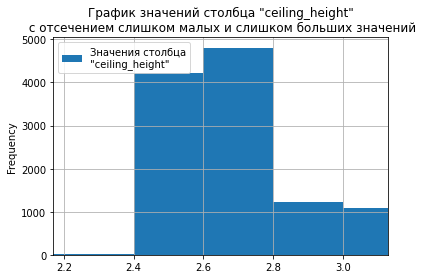

In [23]:
analysis('ceiling_height', 15, 15)

Из гистограммы выдно, что большая часть значений укладывается в общепринятые стандарты (от 2.5 до 3.2 метров). Исключим слишком малые и слишком большие значения, остановимся на отрезке [2.5, 4].

In [24]:
df = df.query('ceiling_height >= 2.5 and ceiling_height <= 4')

#### Изучение и обработка значений столбца 'days_exposition'

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755) 

Примерное минимальное значение столбца days_exposition , на которое
мы будем опираться при отсеивании слишком малых значений: 0 

Примерное максимальное значение столбца days_exposition , на которое
мы будем опираться при отсеивании слишком больших значений: 524.0 

 count    10018.000000
mean       182.994610
std        220.574647
min          1.000000
25%         44.000000
50%         99.000000
75%        236.000000
max       1580.000000
Name: days_exposition, dtype: float64


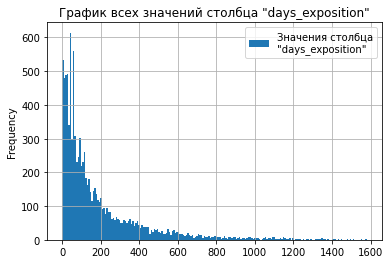

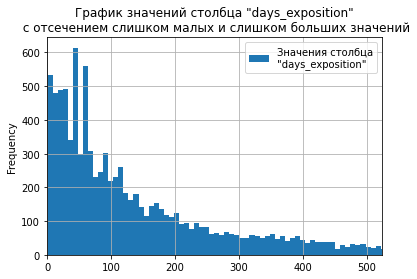

In [25]:
analysis('days_exposition', 200, 200)

Медиана значений столбца 'days_exposition' равна 94 дням, а среднее значение - 177 дням. Смещение среднего значения в большую сторону обусловлено наличием некоторого количества слишком больших значений(максимум 1580). Очень большие значения уберем с помощью квартилей. Так же избавимся от всплесков в 45 и 60 дней, их аномально много.
Продажа квартиры за месяц - это очень быстро. Но это время с момента подачи рекламы до получения продавцом денег за квартиру. Объявления снимают с публикации раньше закрытия сделки. Поэтому выставим минимальное значение 'days_exposition' - 14 дней, за это время реально найти покупателя, начать оформлять документы и закрыть объявление о продаже.

In [26]:
# функция для перевода значений в целочисленный вид
def intd(v): 
    if v-v == 0:
        return int(v)
    return v

In [27]:
df['days_exposition'] = df['days_exposition'].apply(intd)

In [28]:
n = df['square_meter_price'].describe()
maxq = n['75%'] + ((n['75%'] - n['25%'])*1.5)

df = df.query('(days_exposition != [45, 60] and days_exposition > 14 and days_exposition < @maxq) or days_exposition == "Nan"')

Половина объявлений о продаже висели от 52 до 212 дня, всё что меньше 52 и больше 212 можно считать быстрой и долгой продажей соответственно.

#### Факторы, влияющие на стоимость квартиры

Изучим, зависит ли цена от:
 - площади;
 - числа комнат;
 - удалённости от центра;
 - от того, на каком этаже расположена квартира: первом, последнем или другом;
 - от даты размещения: дня недели, месяца и года.

##### Зависимость цены от площади квартиры

Коэффициент корреляции равен: 0.7773345384079574


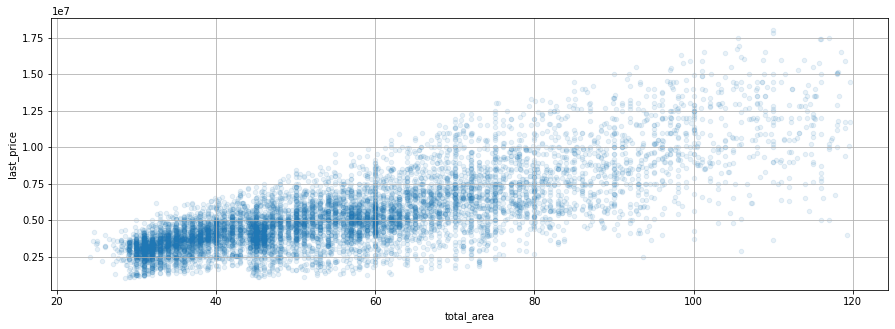

In [29]:
df.plot(y='last_price', x='total_area', kind='scatter', grid = True, alpha = 0.1, figsize = (15, 5))
print('Коэффициент корреляции равен:', df['last_price'].corr(df['total_area']))

Исходя из графика, с увеличением площади квартиры увеличивается и её стоимость. Коэффициент корреляции данных величин - 0.767, что подтверждает практически прямопропорциональную зависимость.

##### Зависимость цены от количества комнат в квартире

Коэффициент корреляции равен: 0.527505134667169


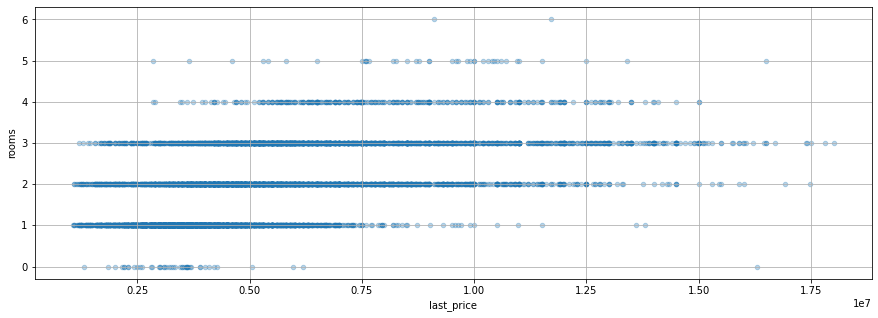

In [30]:
df.plot(x='last_price', y='rooms', kind='scatter',alpha = 0.3, grid = True, figsize = (15, 5))
print('Коэффициент корреляции равен:', df['last_price'].corr(df['rooms']))

С увеличением количества комнат в квартире увеличивается и потолок цен за квартиру. А вот самые недорогие из 1-, 2- и 3-комнатных квартир стоят дешевле самых недорогих студий. Очевидно, что такое распределение цен из-за того, что в Ленинградской области продаются в основном как раз 1-, 2- и 3-комнатные квартиры и их стоимость может быть ниже стоимости студий в Санкт-Петербурге. Но даже при смешении данных по Санкт-Петербургу и непосредственно Ленинградской области прослеживается прямая зависимость роста цены за квартиру при увеличении количества комнат, коэффициент корреляции равен 0,515.
Посмотрим на зависимость цены квартиры от количества комнат с самом Санкт-Петербурге

Коэффициент корреляции: 0.5699399472198822


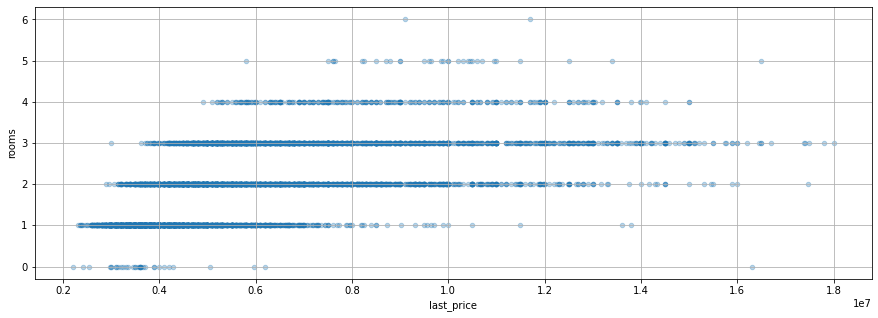

In [31]:
df.query('locality_name == "Санкт-Петербург"').plot(x='last_price', y='rooms', kind='scatter',alpha = 0.3, grid = True, figsize = (15, 5))
print('Коэффициент корреляции:', df.query('locality_name == "Санкт-Петербург"')['last_price'].corr(df['rooms']))

Здесь зависимость очевиднее(коэффициент корреляции: 0,568), хотя студии все так же выделяются.

##### Зависимость цены от удаленности от центра города

Коэффициент корреляции: -0.35235732598822755


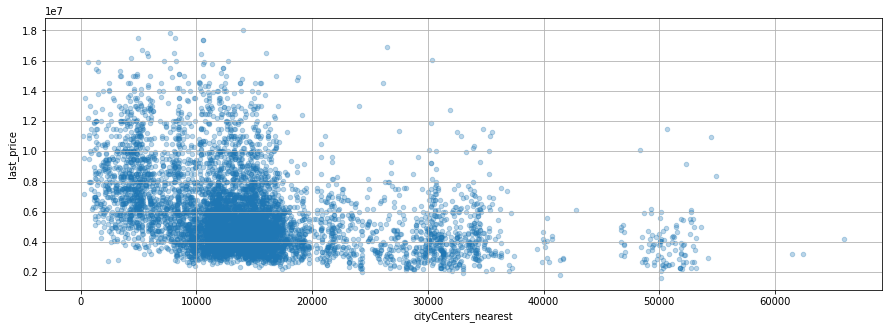

In [32]:
df.query('cityCenters_nearest != "Nan"').plot(y='last_price', x='cityCenters_nearest', kind='scatter', figsize = (15, 5), alpha = 0.3, grid = True)
print('Коэффициент корреляции:', df.query('cityCenters_nearest != "Nan"')['last_price'].corr(df['cityCenters_nearest']))

В данном случае зависимость цены удаленности от центра города имеет обратную пропорциональность, что логично. Коэффициент корреляции: -0.348.

##### Зависимость цены от этажа(первый, последний, другой)

In [33]:
display(df.groupby('floor_category')['last_price'].mean().sort_values(ascending = False))

floor_category
другой       5.503272e+06
последний    5.146292e+06
первый       4.558041e+06
Name: last_price, dtype: float64

Средняя цена квартиры на первом этаже самая низкая. Квартиры на последнем этаже в среднем дороже на 12,5%. Квартиры на других этажах дороже квартир на первом этаже на 18% и дороже квартир на последнем этаже на 7,5%.

##### Зависимость цены от дня, месяца и года публикации

Коэффициент корреляции: -5.72305867229187e-05


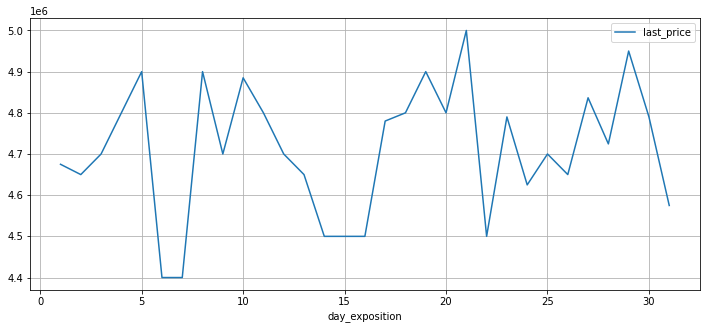

In [34]:
df.pivot_table(index='day_exposition', values='last_price', aggfunc = 'median').plot(grid = True, figsize = (12,5))
print('Коэффициент корреляции:', df['last_price'].corr(df['day_exposition']))

По графику можно сказать, что пики максимальных цен имеются в первых и последних числах месяца, а в середине месяца они держатся на ниском уровне. В остальные дни цена не прогнозируема. Коэффициент корреляции в -0.005 так же указывает на отсутствие зависимости цены от дня публикации.

Коэффициент корреляции: -0.010072061332081777


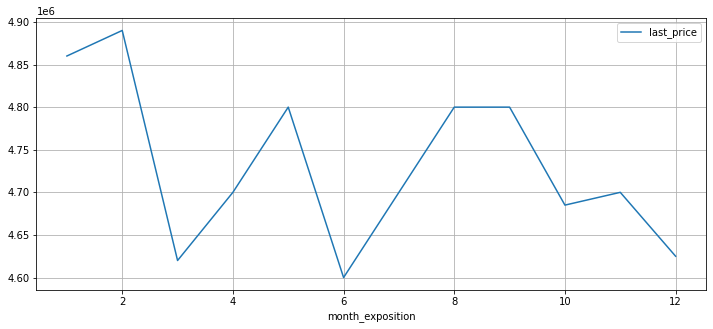

In [35]:
df.pivot_table(index='month_exposition', values='last_price', aggfunc = 'median').plot(grid = True, figsize = (12,5))
print('Коэффициент корреляции:', df['last_price'].corr(df['month_exposition']))

Цены за квартиру максимальны с марта по апрель(пик в апреле), затем идет спад до минимума в июне. Коэффициент корреляции -0.001.

Коэффициент корреляции: -0.038677974984516285


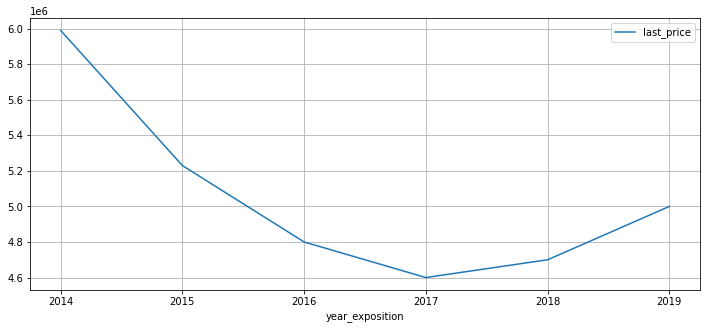

In [36]:
df.pivot_table(index='year_exposition', values='last_price', aggfunc = 'median').plot(grid = True, figsize = (12,5))
print('Коэффициент корреляции:', df['last_price'].corr(df['year_exposition']))

По графику видно, что цены на квартиры падали до 2017 года, а затем начали расти.

#### Топ-10 городов по количеству объявлений

In [37]:
top10 = df.pivot_table(index = 'locality_name', values = 'last_price', aggfunc = 'count').sort_values(by = 'last_price', ascending = False).reset_index().head(10)
top10.set_axis(['locality_name', 'number_of_ads'], axis = 'columns', inplace = True)
display(top10)

,locality_name,number_of_ads
0,Санкт-Петербург,5971
1,Всеволожск,184
2,поселок Мурино,174
3,поселок Шушары,150
4,Пушкин,136
5,деревня Кудрово,129
6,Колпино,122
7,Петергоф,94
8,поселок Парголово,92
9,Сестрорецк,80


Найдём среднюю цену за квадратный метр в каждом из населенных пунктов из Топ-10 по количеству объявлений.

In [38]:
# Функция для поиска средней цены за кв.метр
def aver_price(row): 
    ln = row['locality_name']
    return df.query('locality_name == @ln')['square_meter_price'].mean()

,locality_name,number_of_ads,average_square_meter_price
0,Санкт-Петербург,5971,105624
9,Сестрорецк,80,101827
4,Пушкин,136,100778
5,деревня Кудрово,129,93658
8,поселок Парголово,92,90089
2,поселок Мурино,174,85262
7,Петергоф,94,84480
3,поселок Шушары,150,77197
6,Колпино,122,75050
1,Всеволожск,184,66998


<AxesSubplot:title={'center':'Средняя цена за квадратный метр в городах Ленинградской области'}, xlabel='Населенный пункт', ylabel='Средняя цена за кв.м'>

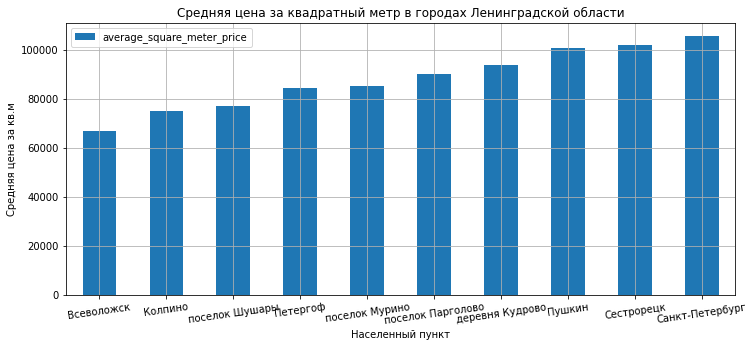

In [39]:
top10['average_square_meter_price'] = top10.apply(aver_price, axis = 1).astype('int')
display(top10.sort_values(by = 'average_square_meter_price', ascending = False))

top10.sort_values(by = 'average_square_meter_price')\
.plot(rot = 8, 
      grid = True, 
      figsize = (12,5), 
      title = 'Средняя цена за квадратный метр в городах Ленинградской области',
      x = 'locality_name', 
      y = 'average_square_meter_price', 
      kind="bar", 
      xlabel = 'Населенный пункт', 
      ylabel = 'Средняя цена за кв.м')

Самая высокая средняя цена за квадратный метр в Санкт-Петербурге и составляет 106470 рублей за кв.метр, самая низкая цена - в Выборге(59630 рублей за кв.метр). Все логично, чем дальше квартира от областного центра, тем меньше цена за каждый её квадратный метр площади.

#### Исследование квартир в центре Санкт-Петербурга

##### Определение центральной зоны Санкт-Петербурга

In [40]:
# функция для перевода расстояния до центра из метров в километры
def km(row):
    num = row['cityCenters_nearest']
    if num % 1000 >= 500:
        return ((num // 1000) + 1)
    return num // 1000

<AxesSubplot:xlabel='cityCenters_nearest_km'>

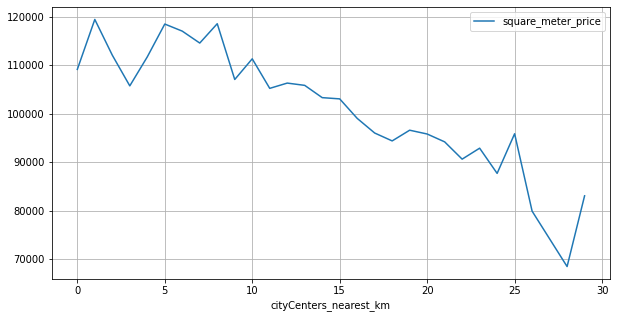

In [41]:
df['cityCenters_nearest_km'] = df.apply(km, axis = 1).apply(intd)

spb_df = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != "Nan"')
spb_df.pivot_table(index='cityCenters_nearest_km', 
                   values='square_meter_price', 
                   aggfunc = 'mean').plot(grid = True, figsize = (10,5))

На отрезке от 0 до 10 км от цетра видим два резких падения цен за квадратный метр, на 3 и 9 километрах. Так как показатель средней цены после 3-х километров потом растет до максимальных значений, за границу центральной зоны возьмем удаленность от центра 9 км включительно.

##### Анализ квартир центральной зоны Санкт-Петербурга

In [42]:
cen_df = spb_df.query('cityCenters_nearest_km <= 9')

In [43]:
# функция построения графиков для сравнения квартир всего Санкт-Петербурга и его центра по определенному признаку
def graf_p(col, xlab, titl, bins):
    plt.figure(figsize=(14, 5))
    plt.hist(spb_df[col], bins, alpha=0.5, label='Санкт-Петербург')
    plt.hist(cen_df[col], bins, alpha=0.5, label='Центр Санкт-Петербурга')
    plt.xlabel(xlab)
    plt.legend(loc='upper right')
    plt.title(titl)
    plt.grid(True)
    plt.show()

###### Анализ квартир по общей площади

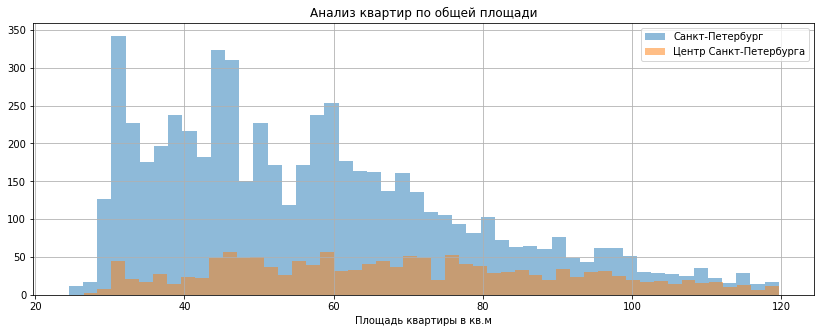

In [44]:
graf_p('total_area', 'Площадь квартиры в кв.м', 'Анализ квартир по общей площади', 50)

Распределение квартир в центре города по oбщей площади похоже на нормальное распределение, пики частоты встреч некоторых значений площадей связаны с тем, что часты случаи, когда минимальные значения площади n-комнатных квартир равны максимальным значениям площадей (n-1)-комнатных квартир. В целом же по городу распределение по площадям смещается влево, преобладают квартиры с небольшой площадью.

###### Анализ квартир по стоимости

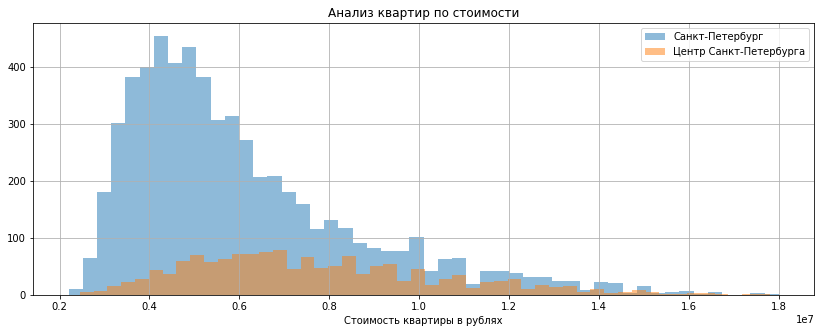

In [45]:
graf_p('last_price', 'Стоимость квартиры в рублях', 'Анализ квартир по стоимости', 50)

Распределение квартир по стоимости в центре Санкт-Петербурга выглядит как нормальное, с пиком в районе 6000000 рублей. Распределение же по всему городу смещено влево, так как по городу больше квартир с малой площадью и соответственно с меньшей стоимостью.

###### Анализ квартир по количеству комнат

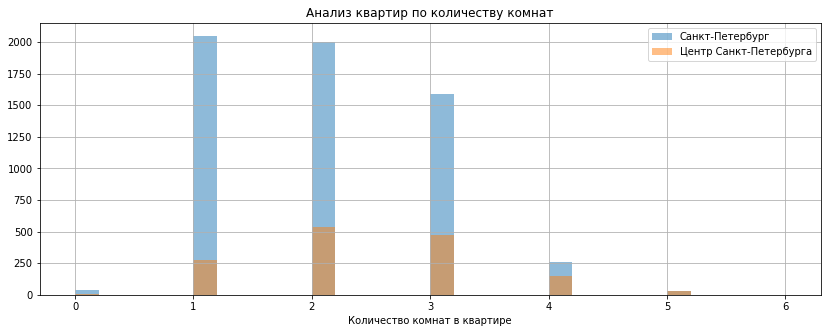

In [46]:
graf_p('rooms', 'Количество комнат в квартире', 'Анализ квартир по количеству комнат', 30)

Распределение квартир по количеству в центре Санкт-Петербурга выглядит как нормальное, пиковые значения частоты упоминания - 2- и 3-комнатные квартиры. По всему Санкт-Петербургу распределение снова смещено влево, преобладают 1- и 2-комнатные квартиры.

###### Анализ квартир по высоте потолков

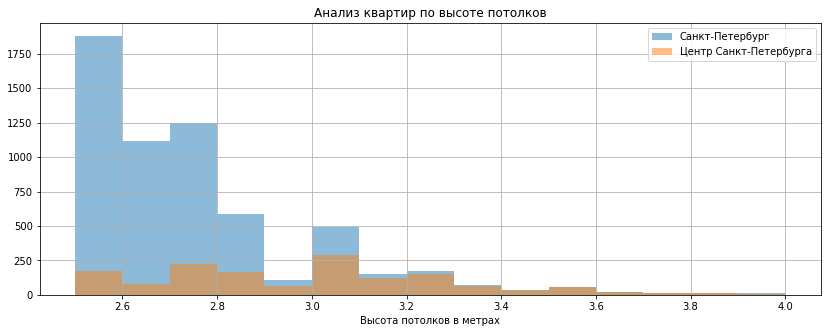

In [47]:
graf_p('ceiling_height', 'Высота потолков в метрах', 'Анализ квартир по высоте потолков', 15)

Гистограмма квартир с определенной высотой потолков в центре Санкт-Петербурга походжа на нормальное распределение с пиком в районе 2.7 метров. По всему городу преобладают квартиры с высотой 2.5 м, что логично, ведь преобладают квартиры с небольшой площадью. А при проектировании квартир минимальная высота потолков напрямую зависит от площади квартиры.

###### Зависимость стоимости квартиры от количества комнат

In [48]:
# функция показывающая зависимость стоимости квартиры от какого-то из её параметров
def price_dep(col):
    print('Коэффициент корреляции цены от данного параметра:\n для центра Санкт-Петербурга ---', 
          round(cen_df['last_price'].corr(cen_df[col]), 3),'\n',
         'для всего Санкт-Петербурга ----', round(spb_df['last_price'].corr(spb_df[col]), 3),'\n',
         'для Ленинградской области -----', round(df['last_price'].corr(df[col]), 3))
    cen_df.plot(x='last_price', y=col, kind='scatter',alpha = 0.3, grid = True, figsize = (15, 5))
    display(cen_df.groupby(col)['last_price'].mean().sort_values(ascending = False))

Коэффициент корреляции цены от данного параметра:
 для центра Санкт-Петербурга --- 0.494 
 для всего Санкт-Петербурга ---- 0.57 
 для Ленинградской области ----- 0.528


rooms
5    1.001778e+07
4    9.646627e+06
6    9.100000e+06
3    8.885825e+06
2    7.338858e+06
0    6.481429e+06
1    5.280326e+06
Name: last_price, dtype: float64

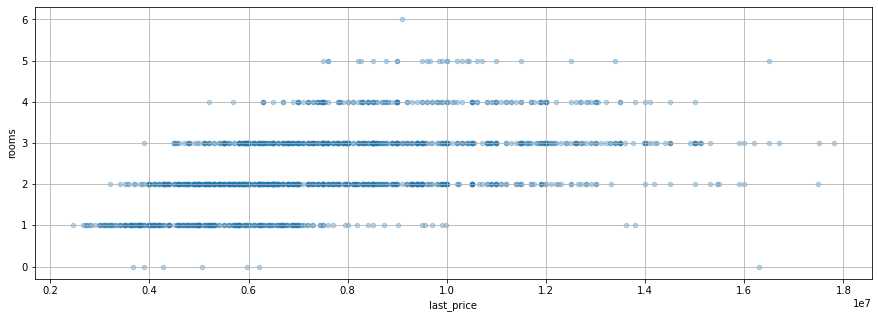

In [49]:
price_dep('rooms')

Анализ зависимости показывает, что чем больше комнат в квартире, тем она дороже стоит. Это справедливо как для квартир в самом центре Санкт-Петербурга, так и в Ленинградской области. Коэффициенты корреляции это подтверждают и показывают так же, что везде эта зависимость почти одинакова.

###### Зависимость стоимости квартиры от этажа

In [50]:
display(cen_df.groupby('floor_category')['last_price'].mean().sort_values(ascending = False))

floor_category
другой       7.927251e+06
последний    7.869356e+06
первый       6.449451e+06
Name: last_price, dtype: float64

Зависимость стоимости квартиры от этажа сохраняется и в случае центра Санкт-Петербурга. Первый этаж самый дешевый, потом идет последний этаж и самые дорогие этажи принадлежат группе "другие".

###### Зависимость стоимости квартиры от удаленности от центра

Коэффициент корреляции цены от данного параметра:
 для центра Санкт-Петербурга --- -0.254 
 для всего Санкт-Петербурга ---- -0.384 
 для Ленинградской области ----- -0.354


cityCenters_nearest_km
0.0    1.032000e+07
1.0    9.383000e+06
5.0    8.354812e+06
2.0    8.343967e+06
4.0    8.315848e+06
3.0    7.965727e+06
6.0    7.891566e+06
8.0    7.478169e+06
7.0    6.938161e+06
9.0    6.188577e+06
Name: last_price, dtype: float64

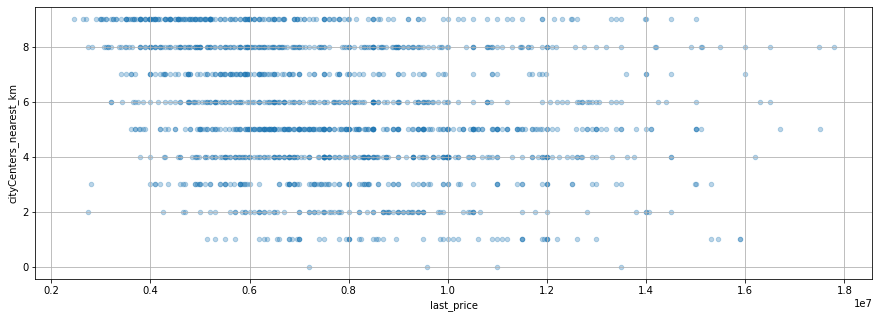

In [51]:
df.query('cityCenters_nearest !="Nan" and locality_name != "Санкт-Петербург"')
price_dep('cityCenters_nearest_km')

Анализ соотношения цены от удаленности показал, что чем дальше квартира от центра города, тем она дешевле. Тенденция сохраняется как в Санкт-Петербурге, так и в других городах Ленинградской области.

###### Зависимость стоимости квартиры от даты публикации объявления о продаже

In [52]:
def date(col):
    cen_df.pivot_table(index=col, values='last_price', aggfunc = 'median').plot(grid = True, figsize = (12,5))

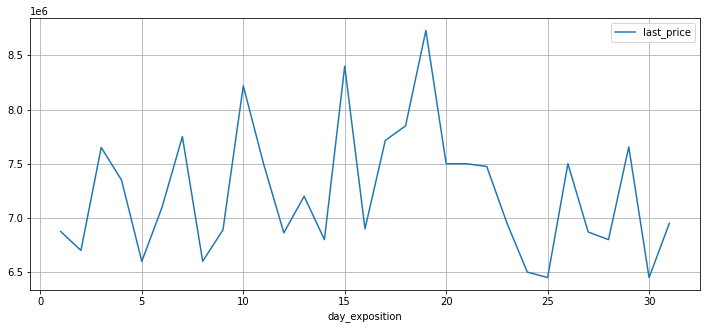

In [53]:
date('day_exposition')

Зависимость стоимости квартиры от дня публикации объявления не прослеживается.

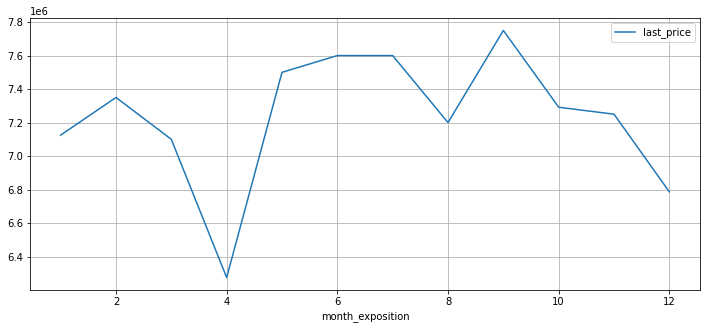

In [54]:
date('month_exposition')

График указывает, что максимальные цены на квартире в центре Санкт-Петербурга в сентябре, минимум же в июне и декабре. Если сравнивать со всей Ленинградской областью, то ситуация немного изменилась, так как в области максимум выпадал на февраль и сенбябрь, а минимум был в июне.

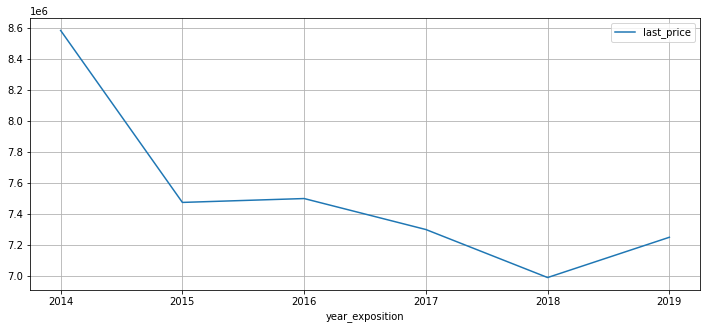

In [55]:
date('year_exposition')

Согласно графику, цена на квартиры падала до 2017, затем начала расти. В области же наблюдается та же самая картина.

### Шаг 5. Общий вывод

В данном проекте были изучены и проанализированы данные по объявлениям продажи квартир в Санкт-Петербурге и других городах Ленинградской области. Были выявлены факторы, влияющие на цену квадратного метра жилья. 

В первую очередь на данный параметр влияет расположение квартиры. Начнем с этажа. Первый этаж, последний, остальные - именно в такой последовательности цена за кв.метр растет в зависимости от этажа. Далее идет удаленность от центра города: чем ближе квартира к центру города, тем дороже она оценивается. И наконец на цену влияет и сам город. Тут ситуация похожа на стоимость кв.метра в пределах одного города, только в большем масштабе: чем ближе населенный пункт, в котором находится квартира, к областному центру, тем она дороже. Тут еще оказывает влияние и то, насколько развит сам населенный пункт.

Так же на цену кв.метра влияет и месяц размещения объявления. Это пиковые значения приходятся на апрель и сентябрь (в Санкт-Петербурге выделяется только пик в сентябре), а наименьшие цены приходятся на июнь и октябрь(в Санкт-Петербурге - июнь и декабрь). Год публикации тоже имеет значение, квартиры в Ленинградской области падали в цене до 2017 года, затем начался рост их стоимости. В Санкт-Петербурге ситуация такая же.

Что же касается цен на квартиры в целом, то тут всё конечно же зависит от общей площади квартиры и факторов, на нее влияющих. Таких, например, как количество комнат. Чем больше комнат, тем больше площадь квартиры и, соответственно, тем больше её цена.
Высота потолков и день публикации объявления не имеют выраженного влияния на стоимость квартиры.